# kettler analysis

## intro code

In [1]:
import os
import sys
import pandas as pd
from pathlib import Path
from textwrap import wrap
import plotly.express as px
import datetime as dt
import warnings
import requests

exec(
    requests.get(
        "https://gist.githubusercontent.com/smeisegeier/4944b9a88b7a90cb1b2acc6da0dd906f/raw/"
    ).text
)

# * get plotting mods
exec(requests.get(
    'https://gist.githubusercontent.com/smeisegeier/2a3c931c987dbfaa23ff0ca6e9955829/raw/'
    ).text)

# * get src directory which *must* be parent
dir_src = Path(os.getcwd()).parent.parent

# # * add to path
# if dir_src.as_posix() not in sys.path:
#     sys.path.append(dir_src.as_posix())

# * display / style settings
pd.options.display.max_rows = 100
pd.options.display.max_colwidth = 160
pd.options.display.precision = 2
pd.options.mode.chained_assignment = None


# * theme settings
# THEME = "light"
THEME = "light"
os.environ["THEME"] = THEME

if THEME == "dark":
    THEME_PLOTLY = "plotly_dark"
else:
    THEME_PLOTLY = "plotly"

print(f"last run: {dt.datetime.now()}")

last run: 2024-01-27 22:29:01.626659


## load data

In [2]:
df_training=pd.read_parquet('data/trainings.pq')
df_records=pd.read_parquet('data/records.pq')

## analysis

In [3]:
describe_df(df_training.iloc[:,1:], 'training', use_columns=False, use_plot=False)

🔵 *** df: training ***
🟣 shape: (1_125, 13) columns: ['Device', 'Calibration', 'Software', 'Date', 'Time', 'RecordIntervall', 'Transmission', 'Energy', 'TrainingDateTime', 'FileName', 'CreatedAt', 'Duration_minutes', 'Streak_days'] 
🟣 duplicates: 0
🟣 missings: {'Device': 0, 'Calibration': 0, 'Software': 0, 'Date': 0, 'Time': 0, 'RecordIntervall': 0, 'Transmission': 0, 'Energy': 0, 'TrainingDateTime': 0, 'FileName': 0, 'CreatedAt': 0, 'Duration_minutes': 0, 'Streak_days': 0}
--- column uniques (all)
🟠 Device(1|object)
🟠 Calibration(1|object)
🟠 Software(1|object)
🟠 Date(1_121|object)
🟠 Time(1_107|object)
🟠 RecordIntervall(1|object)
🟠 Transmission(1|object)
🟠 Energy(1|object)
🟠 TrainingDateTime(1_124|object)
🟠 FileName(1_125|object)
🟠 CreatedAt(45|datetime64[ns])
🟠 Duration_minutes(114|float64)
🟠 Streak_days(13|int64)
--- column stats (numeric)
🟠 Duration_minutes(114|float64) min: 0.667 | max: 73.833 | median: 30.0 | mean: 32.322 | std: 6.591 | cv: 0.204 | sum: 36_361.833 | skew: 2.579 | 

,Device,Calibration,Software,Date,Time,RecordIntervall,Transmission,Energy,TrainingDateTime,FileName,CreatedAt,Duration_minutes,Streak_days
0,SJ10X SKYLON 5,07655-350-2007,3367,11.01.2014,20:09:26,10,9.5,6.0,2014-01-11T20:09:26+01:00,Training 11.01.2014 20h09m26s.xml,2021-01-07 23:58:46.053121,53.17,0
1,SJ10X SKYLON 5,07655-350-2007,3367,12.01.2014,18:49:44,10,9.5,6.0,2014-01-12T18:49:44+01:00,Training 12.01.2014 18h49m44s.xml,2021-01-07 23:58:46.053121,56.67,0
2,SJ10X SKYLON 5,07655-350-2007,3367,13.01.2014,21:56:13,10,9.5,6.0,2014-01-13T21:56:13+01:00,Training 13.01.2014 21h56m13s.xml,2021-01-07 23:58:46.053121,59.17,0


🔵 *** df: records ***
🟣 shape: (218_171, 7) columns: ['Pulse', 'Power', 'RPM', 'TimePassed_minutes', 'TimePassed_percent', 'Score_10sec', 'TrainingId'] 
🟣 duplicates: 0
🟣 missings: {'Pulse': 0, 'Power': 0, 'RPM': 0, 'TimePassed_minutes': 0, 'TimePassed_percent': 0, 'Score_10sec': 0, 'TrainingId': 0}
--- column uniques (all)
🟠 Pulse(182|int64)
🟠 Power(52|int64)
🟠 RPM(61|int64)
🟠 TimePassed_minutes(443|float64)
🟠 TimePassed_percent(23_272|float64)
🟠 Score_10sec(1_029|float64)
🟠 TrainingId(1_125|int64)
--- column stats (numeric)
🟠 Pulse(182|int64) min: 0 | max: 220 | median: 78.0 | mean: 65.203 | std: 64.223 | cv: 0.985 | sum: 14_225_458 | skew: 0.096 | kurto: -1.735
🟠 Power(52|int64) min: 25 | max: 300 | median: 160.0 | mean: 160.233 | std: 23.28 | cv: 0.145 | sum: 34_958_190 | skew: -0.643 | kurto: 2.316
🟠 RPM(61|int64) min: 14 | max: 89 | median: 54.0 | mean: 53.633 | std: 3.557 | cv: 0.066 | sum: 11_701_072 | skew: -0.818 | kurto: 6.298
🟠 TimePassed_minutes(443|float64) min: 0.167 | m

,Pulse,Power,RPM,TimePassed_minutes,TimePassed_percent,Score_10sec,TrainingId
0,0,50,46,0.17,3.13e-03,1.97e-03,1
1,0,150,45,36.17,6.80e-01,5.77e-03,1
2,0,150,49,36.00,6.77e-01,6.28e-03,1


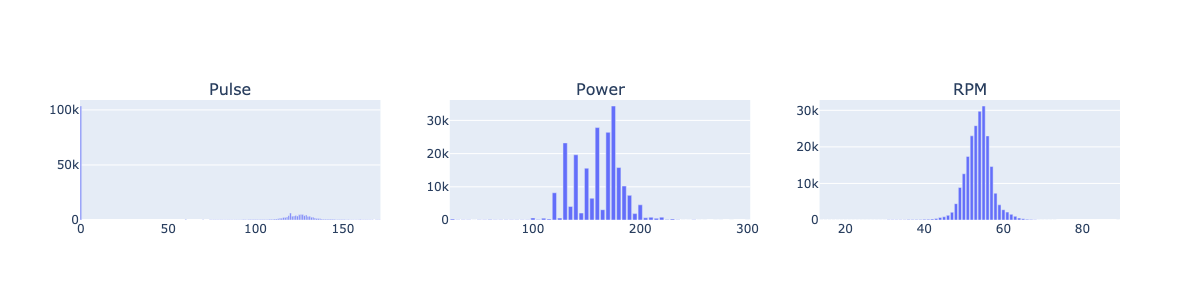

In [4]:
describe_df(df_records.iloc[:,1:], 'records', use_columns=False, fig_offset=-4)

## enhance tables

In [5]:
#
# * tailor and join both tables

# * id col is new index
if "Id" in df_training.columns:
    df_training.set_index("Id", inplace=True, drop=True)
if "Id" in df_records.columns:
    df_records.set_index("Id", inplace=True, drop=True)

# * convert to proper datetime (remove 'T')
df_training.TrainingDateTime = pd.to_datetime(
    df_training.TrainingDateTime, errors="coerce"
)

# * add daytime (3 cats: morning, day, evening)
df_training["daytime"] = df_training.TrainingDateTime.dt.hour.map(
    lambda x: "morning" if x < 13 else "day" if x < 18 else "evening"
)

# * add day_of_week
df_training["day_of_week"] = df_training.TrainingDateTime.dt.strftime("%A")

# * add date
df_training["training_date"] = df_training.TrainingDateTime.dt.date.astype("datetime64")

# * join both tables on records level
df = df_records.join(df_training, on="TrainingId")

# * drop unneeded columns: filename, createdat, TrainingId
cols_drop = [col for col in df if len(df[col].unique()) == 1]
print(f"remove these one-item columns:{cols_drop}")

cols_drop += ["Date", "Time", "FileName", "CreatedAt", "TrainingId"]

df.drop(
    # * subtract columns to make the statement idempotent
    columns=set(df.columns) & set(cols_drop),
    inplace=True,
)
df[:3]

remove these one-item columns:['Device', 'Calibration', 'Software', 'RecordIntervall', 'Transmission', 'Energy']


,Pulse,Power,RPM,TimePassed_minutes,TimePassed_percent,Score_10sec,TrainingDateTime,Duration_minutes,Streak_days,daytime,day_of_week,training_date
Id,,,,,,,,,,,,
1,0,50,46,0.17,3.13e-03,1.97e-03,2014-01-11 20:09:26+01:00,53.17,0,evening,Saturday,2014-01-11
2,0,150,45,36.17,6.80e-01,5.77e-03,2014-01-11 20:09:26+01:00,53.17,0,evening,Saturday,2014-01-11
3,0,150,49,36.00,6.77e-01,6.28e-03,2014-01-11 20:09:26+01:00,53.17,0,evening,Saturday,2014-01-11


## duration

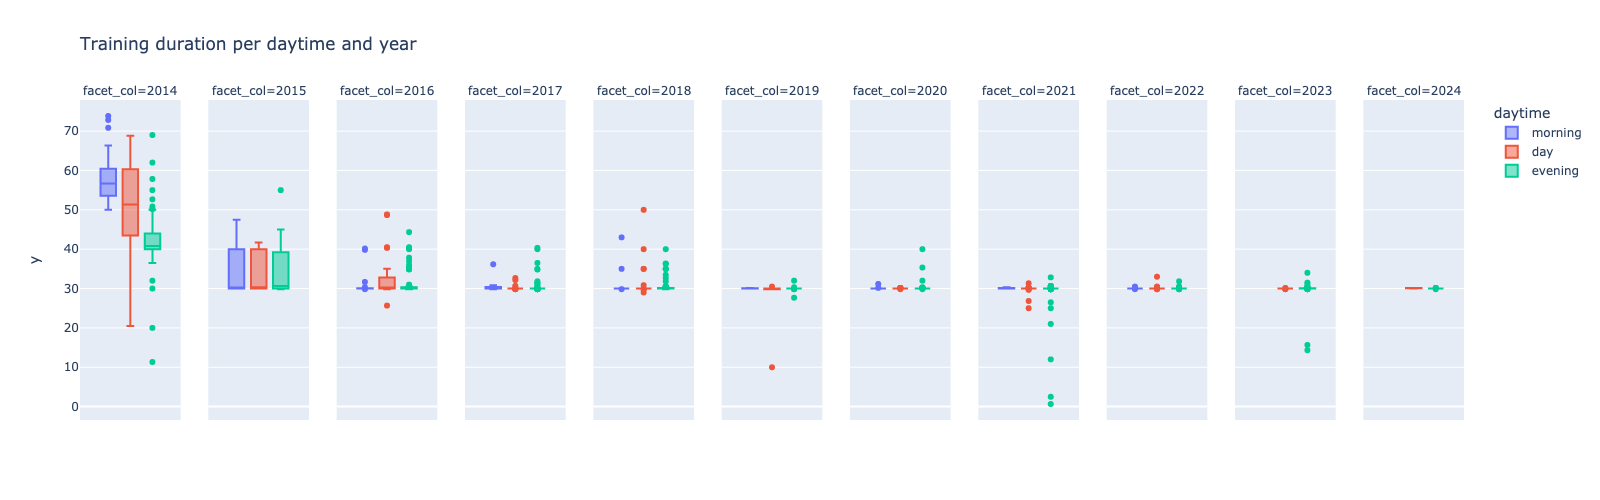

In [6]:
_df = df_training.copy()
# * add aux cols for sorting
_df['_daytime'] = pd.Categorical(_df.daytime, ["morning", "day", "evening"])
_df['_year'] = _df.TrainingDateTime.dt.year

_fig = px.box(
    _df.sort_values(by=["_year","_daytime"]),
    y=_df.Duration_minutes,
    template=THEME_PLOTLY,
    color='daytime',
    points="outliers",
    # points=False,
    facet_col=_df.TrainingDateTime.dt.year,
    # height=300,
    width=1600,
    title="Training duration per daytime and year",
    )
_fig.show('png')

## streaks

In [7]:
#
# * copy table, must be sorted by TrainingDateTime
_df = (
    df_training.sort_values("TrainingDateTime")
    .reset_index()
    [["Id", "training_date"]]
    .copy()
)

# * add bool for "is a sequence", check if delta to previous training is 1
_df['sequence'] = (_df['training_date'] - _df.shift(1)['training_date']).dt.days.astype('Int16').fillna(1) == 1
# _df['no_interruption_days'] = (_df['training_date'] - _df['training_date'].shift(1)).dt.days.fillna(1).ne(1).cumsum()

# * add section number. cumsum increases on a certain condition (when sequence is False, streak has ended)
_df['section'] = (~_df.sequence).cumsum()

# * fix edge case: very first section has no predessesor and belongs to first streak
_df.loc[1, 'section'] = 0

display(_df[:3])

# * calculate streak
df_training_streak=(_df.groupby(
    'section',
    as_index=False,     # only relevant for series output
    observed=False,     # speeds up processing for large data
    )
    .agg({
        'section':'count',
        'training_date':['min','max'],
        })
    .droplevel(axis=1, level=0)
    .rename(columns={'count':'streak_days', 'min':'start_date', 'max':'end_date'})
    .sort_values(by='streak_days', ascending=False)
    )
df_training_streak[:3]


,Id,training_date,sequence,section
0,1,2014-01-11,True,False
1,2,2014-01-12,True,0
2,3,2014-01-13,True,0


,streak_days,start_date,end_date
280,23,2018-06-10,2018-07-02
485,19,2022-04-17,2022-05-05
395,19,2020-12-28,2021-01-15


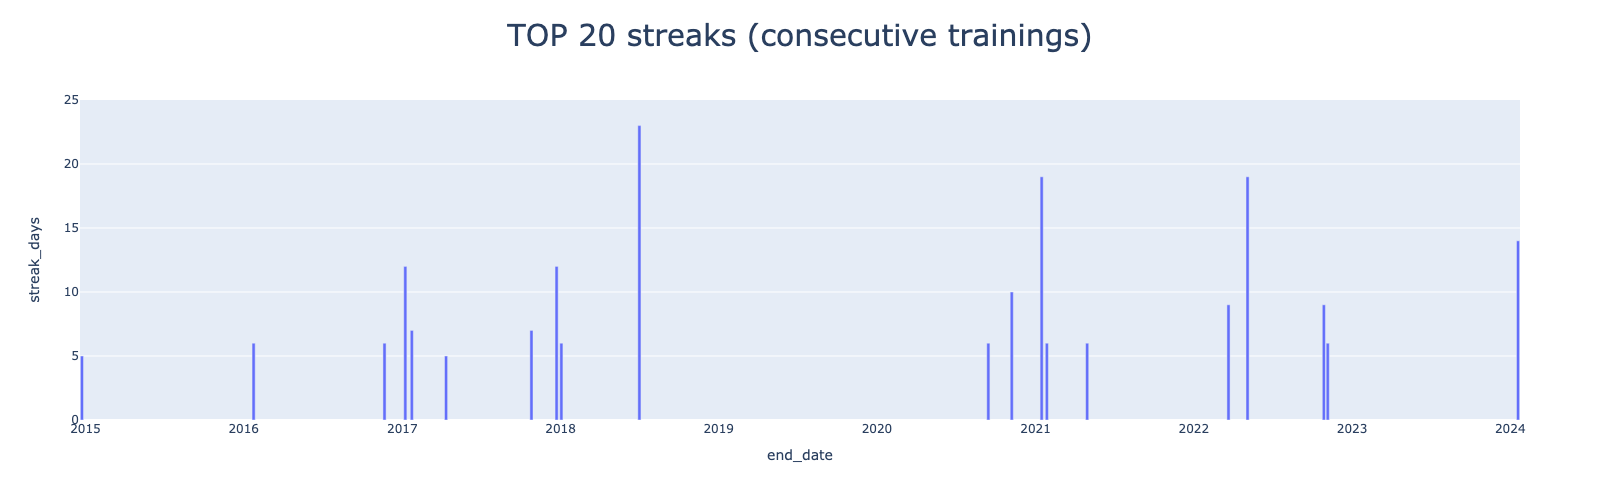

In [8]:
_df = df_training_streak.copy()[:20]
_fig = px.bar(
    _df,
    y="streak_days",
    x=_df['end_date'].astype(str),
    # text='streak_days',
    width=1600,
    labels={"x": "end_date"},
    title="TOP 20 streaks (consecutive trainings)",
    template=THEME_PLOTLY,

)
_fig.update_layout(
    title={
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top',
        'font': {'size': 30, }
    },
    yaxis_range=[0, 25],
)
_fig.show('png')
_fig.write_image('img/top20streaks.png')



## aggregations

In [9]:
df=(df_training
    .merge(
        df_records,
        left_on='Id',
        right_on='TrainingId',
    )
)
df['year']=df['TrainingDateTime'].dt.year

In [10]:
df.groupby(
    'year',
    # as_index=False,
    ).agg({
        'training_date':['min', 'max','nunique'],
        'Duration_minutes':['min', 'max', 'mean'],
        'Power':['max', 'mean'],
        }
    )

training_date                    Duration_minutes               Power  \
               min        max nunique              min    max   mean   max   
year                                                                         
2014    2014-01-11 2014-12-24     119            11.33  73.83  48.52   275   
2015    2015-01-03 2015-12-31      95            29.83  55.00  35.15   230   
2016    2016-01-02 2016-12-31     131            25.67  48.83  31.96   250   
2017    2017-01-01 2017-12-31     134            29.83  40.33  30.49   250   
2018    2018-01-01 2018-12-31     132            29.00  50.00  31.04   300   
2019    2019-01-01 2019-12-22      53            10.00  32.00  29.87   240   
2020    2020-04-07 2020-12-31      90            29.83  40.00  30.28   235   
2021    2021-01-01 2021-12-31     130             0.67  32.83  29.83   230   
2022    2022-01-03 2022-12-31     113            29.83  33.00  30.09   200   
2023    2023-01-02 2023-12-04     109            14.33  34.00  29.96   250   
2024    2024-01-03 2024-01-19      15            29.83  30.17  30.03   175   

              
        mean  
year          
2014  132.13  
2015  138.07  
2016  144.49  
2017  164.50  
2018  178.17  
2019  177.40  
2020  162.25  
2021  176.16  
2022  173.47  
2023  177.60  
2024  174.19

## numerics

In [11]:
df=df_training.iloc[:,[8,11]]
df['year']=df['TrainingDateTime'].dt.year.astype(str)
_df1=df[df['year']<'2022'].iloc[:,[2,1]]
_df2=df.iloc[:,[2,1]]


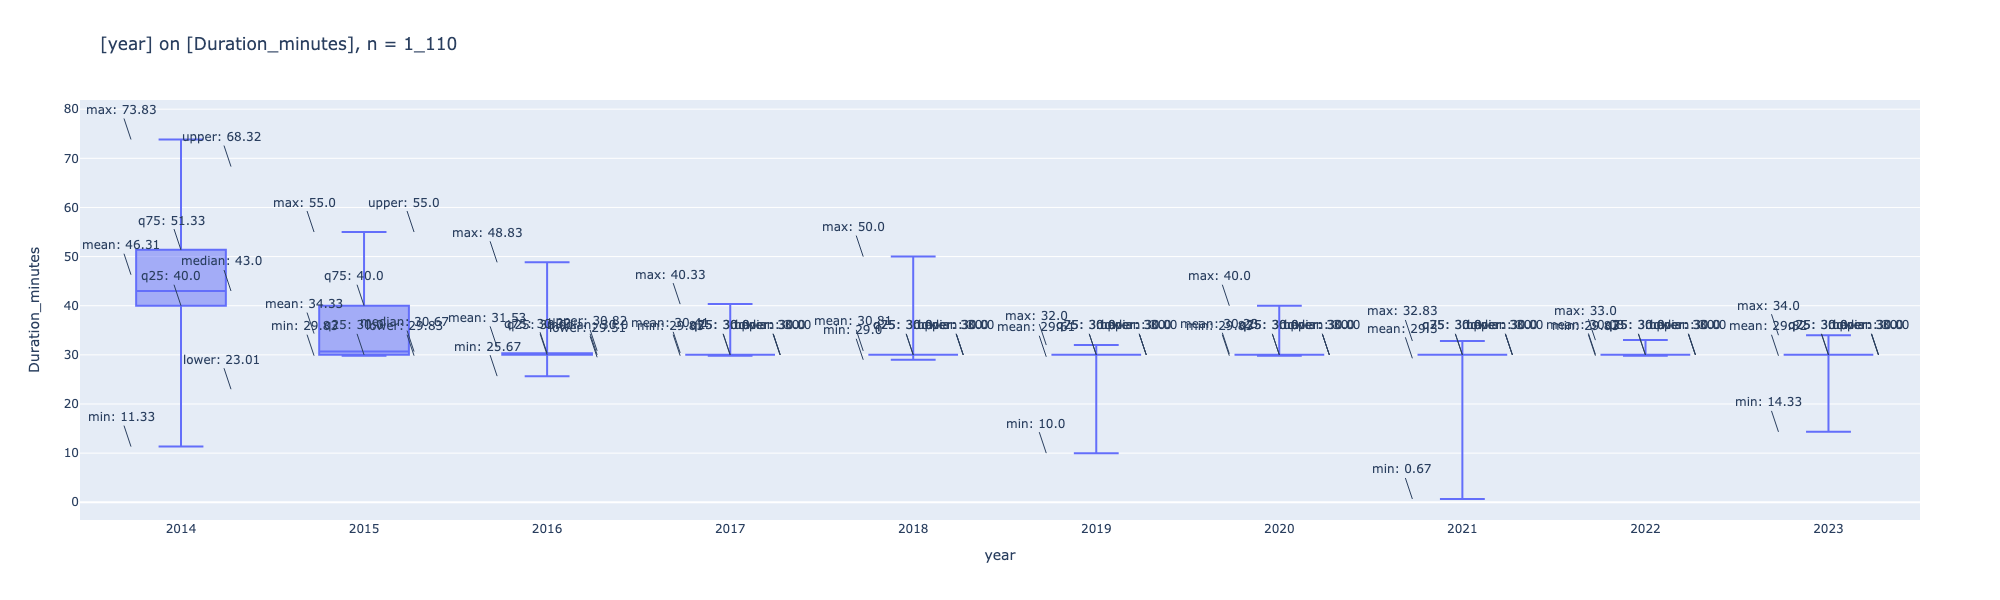

In [12]:
_df1=df[df['year']<'2024'].iloc[:,[2,1]]
plot_boxes(_df1,annotations=True, width=2000)

In [13]:
# lol = px.data.iris()[["species", "sepal_width"]]
# plot_boxes(lol, "sepia", width=800, )

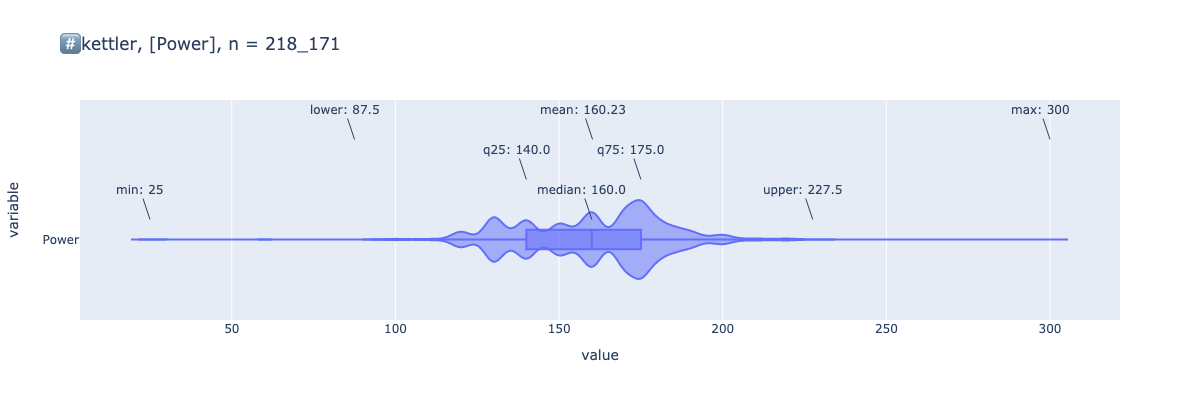

In [14]:
plot_box(df_records['Power'], height=400, violin=True, caption='kettler')

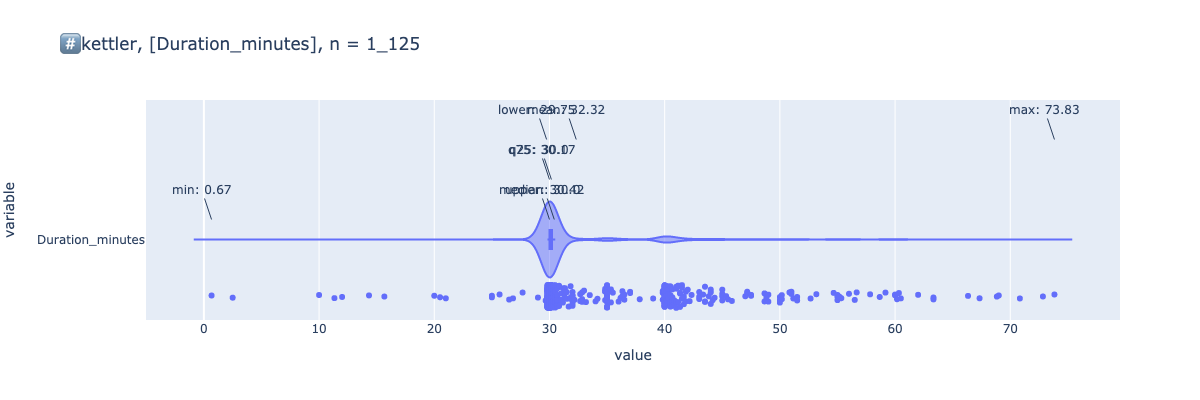

In [15]:
plot_box(df_training['Duration_minutes'], height=400, violin=True, caption='kettler', points='all')

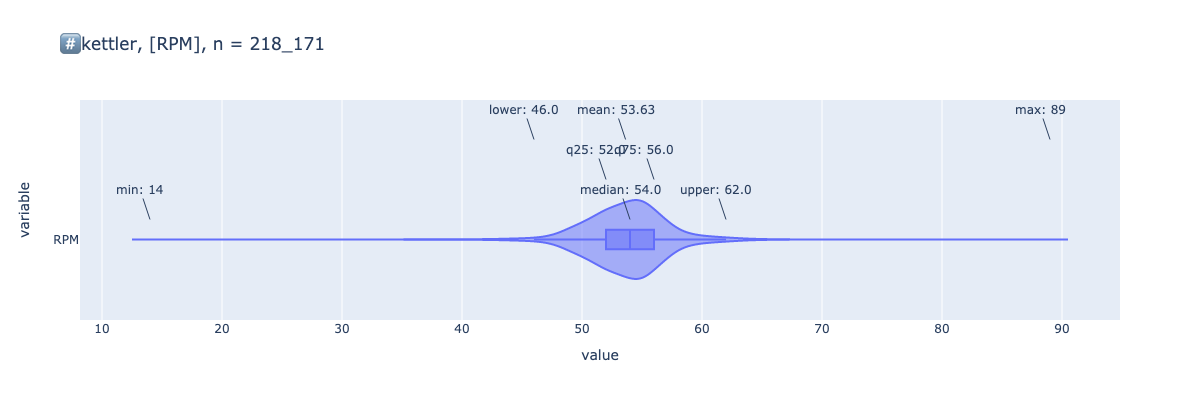

In [16]:
plot_box(df_records['RPM'], height=400, violin=True, caption='kettler')